matchTemplate()
- convert to gray scale
- load the template 
- use matchTemplate()

HarrisCornerDetection()
- convert to gray scale
- cornerHarris(img_gray,blocksize = 55,ksize=3,k=0.04)




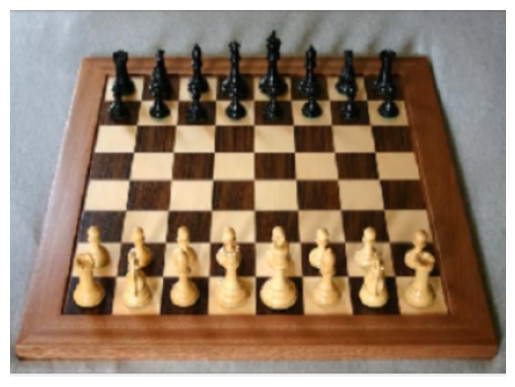

In [ ]:
#Import the OpenCV and NumPy libraries.
import cv2
import numpy as np
import matplotlib.pyplot as plt


#img = cv2.imread('shapes-01.jpeg')
img=cv2.imread('chess.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()

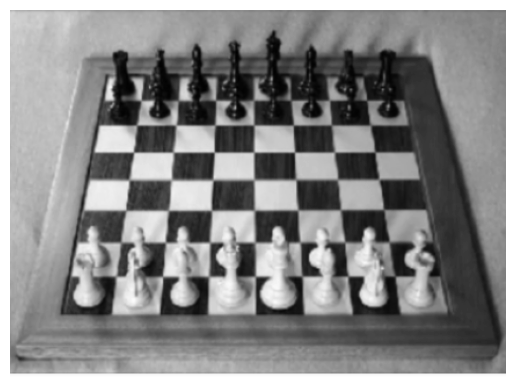

In [ ]:
#convert the color image in gray level
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray,cmap='gray')
plt.axis('off')
plt.show()

Rmax= 0.0066732215


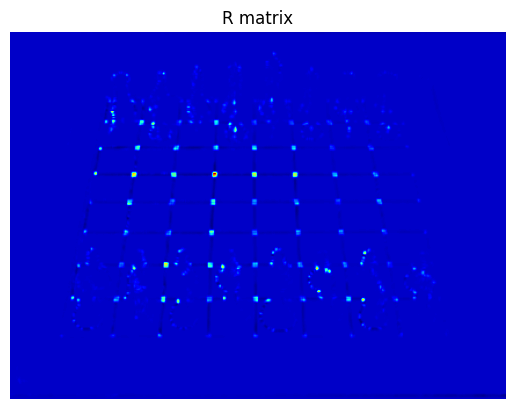

In [ ]:
# Apply Harris corner detection
# The parameter blockSize is the size of the window to consider as neighborhood 
#and k is the free parameter of the R function of Harris detector. 
#The result is the score R and we use this to detect corners.

R = cv2.cornerHarris(img_gray, blockSize = 3, ksize = 1, k = 0.01)

print('Rmax=',R.max())

plt.imshow(R,cmap='jet')
plt.axis('off')
plt.title('R matrix')
plt.show()



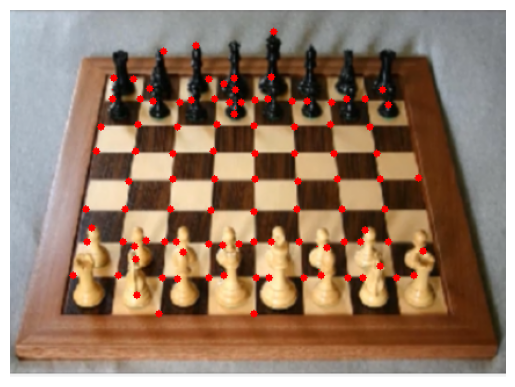

In [ ]:
# Spot in red the detected corners
# Threshold for an optimal value, it may vary depending on the image.
img_2 = img.copy()
img_2[R>0.5*R.max()]=[255,0,0]
plt.imshow(img_2)
plt.axis('off')
plt.show()

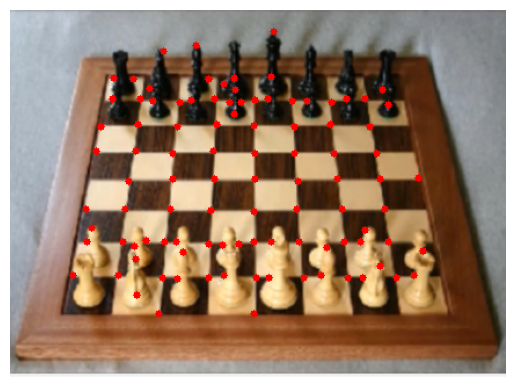

In [ ]:
# Shi-Tomasi corner detection function
# We are detecting only 100 best corners here
# You can change the number to get desired result.
corners = cv2.goodFeaturesToTrack(img_gray, 100, 0.01, 10)
  
# convert corners values to integer
# So that we will be able to draw circles on them
corners = np.int0(corners)
  
# draw red color circles on all corners
for i in corners:
    x, y = i.ravel()
    cv2.circle(img, (x, y), 3, (255, 0, 0), -1)
  
# resulting image
plt.axis('off')
plt.imshow(img)